# SEN12MS

Examples and statistics of the SEN12MS data set for image-wise landcover classification on cloudy and non-cloudy images.

In [1]:
import sys
import os

os.chdir("/home/jakob/Documents/PhD/Projects/ModalityRelevanceScores")
sys.path.append("/home/jakob/Documents/PhD/Projects/ModalityRelevanceScores")
sys.path.append("/home/jakob/Documents/PhD/Projects/ModalityRelevanceScores/code")
import numpy as np
import torch
import matplotlib.pyplot as plt
from datasets.SEN12MS import SEN12MS, ToTensor, Normalize, CLASS_NAMES
import torchvision.transforms as transforms


DATA_DIR_CLEAR = "/home/gawl_ja/Data/SEN12MS/SEN12MS_orig/"
DATA_DIR_CLOUDY = "/home/gawl_ja/Data/SEN12MS/SEN12MSCR/"
LABEL_SPLIT_DIR = "/home/gawl_ja/Projects/ModalityRelevanceScores/0005_SEN12MS_Train_and_Evaluate/DataSplits"
    
bands_mean = {'s1_mean': [-11.76858, -18.294598],
                's2_mean': [1226.4215, 1137.3799, 1139.6792, 1350.9973, 1932.9058,
                            2211.1584, 2154.9846, 2409.1128, 2001.8622, 1356.0801]}

brg_mean = np.array([[[1137.3799]], [[1139.6792]], [[1350.9973]]])
brg_std = np.array([[[740.883]], [[960.1045]], [[946.76056]]])

sar_mean = np.array([[[-11.76858]], [[-18.294598]]])
sar_std = np.array([[[4.525339]], [[4.3586307]]])

bands_std = {'s1_std': [4.525339, 4.3586307],
                's2_std': [741.6254, 740.883, 960.1045, 946.76056, 985.52747,
                        1082.4341, 1057.7628, 1136.1942, 1132.7898, 991.48016]} 

imgTransform = transforms.Compose([ToTensor(),Normalize(bands_mean, bands_std)])

/home/jakob/Documents/PhD/Projects/ModalityRelevanceScores/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


#### Load Training and Validation Data

In [2]:
train_clear = SEN12MS(DATA_DIR_CLEAR,
                        DATA_DIR_CLOUDY, 
                        LABEL_SPLIT_DIR, 
                        img_transform=imgTransform, 
                        label_type="single_label", 
                        threshold=0, 
                        subset="train", 
                        use_s1=True, 
                        use_s2=True, 
                        use_rgb=True,
                        use_cloudy=False,
                        cloud_frac=1,
                        igbp_s=True,
                        pre_load=False)

train_cloudy = SEN12MS(DATA_DIR_CLEAR,
                        DATA_DIR_CLOUDY, 
                        LABEL_SPLIT_DIR, 
                        img_transform=imgTransform, 
                        label_type="single_label", 
                        threshold=0, 
                        subset="train", 
                        use_s1=True, 
                        use_s2=True, 
                        use_rgb=True,
                        use_cloudy=True,
                        cloud_frac=1,
                        igbp_s=True,
                        pre_load=False)

test_clear = SEN12MS(DATA_DIR_CLEAR,
                        DATA_DIR_CLOUDY, 
                        LABEL_SPLIT_DIR, 
                        img_transform=imgTransform, 
                        label_type="single_label", 
                        threshold=0, 
                        subset="test", 
                        use_s1=True, 
                        use_s2=True, 
                        use_rgb=True,
                        use_cloudy=False,
                        cloud_frac=1,
                        igbp_s=True,
                        pre_load=False)

test_cloudy = SEN12MS(DATA_DIR_CLEAR,
                        DATA_DIR_CLOUDY, 
                        LABEL_SPLIT_DIR, 
                        img_transform=imgTransform, 
                        label_type="single_label", 
                        threshold=0, 
                        subset="test", 
                        use_s1=True, 
                        use_s2=True, 
                        use_rgb=True,
                        use_cloudy=True,
                        cloud_frac=1,
                        igbp_s=True,
                        pre_load=False)

path clear:  /home/gawl_ja/Data/SEN12MS/SEN12MS_orig/
path cloudy:  /home/gawl_ja/Data/SEN12MS/SEN12MSCR/


AssertionError: /home/gawl_ja/Data/SEN12MS/SEN12MS_orig/

# Class Distributions and Cloud Coverage

In [6]:
labels_train_clear = train_clear.get_labels().argmax(-1)
labels_train_cloudy = train_cloudy.get_labels().argmax(-1)
labels_test_clear = test_clear.get_labels().argmax(-1)
labels_test_cloudy = test_cloudy.get_labels().argmax(-1)

labels_train_clear = np.unique(labels_train_clear, return_counts=True)
labels_train_cloudy = np.unique(labels_train_cloudy, return_counts=True)
labels_test_clear = np.unique(labels_test_clear, return_counts=True)
labels_test_cloudy = np.unique(labels_test_cloudy, return_counts=True)


label_names = CLASS_NAMES


fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

x = range(len(CLASS_NAMES))
width = 0.35

ax1.bar(labels_train_clear[0]-width, labels_train_clear[1], width, label='Training Data Set', align='edge')
ax1.bar(labels_test_clear[0], labels_test_clear[1], width, label='Test Data Set', align='edge')
ax1.set_title('Training Set Label Distribution')
ax1.set_xlabel('Classes')
ax1.set_ylabel('Counts')
ax1.set_xticks(x)
ax1.set_xticklabels(CLASS_NAMES, rotation=45, ha="right")
ax1.legend()

# Adjust layout to prevent overlapping of labels
plt.tight_layout()

# Show plot
s_train, coverage_train = train_cloudy.get_coverage()
s_test, coverage_test = test_cloudy.get_coverage()


ax2.hist(coverage_train, bins=22, alpha=0.7, label='Training', color='blue', density=True)
ax2.set_title('Training Cloud Coverage Distribution')
ax2.set_xlabel('Cloud Coverage')
ax2.set_ylabel('Density')

# Plotting the second histogram
ax3.hist(coverage_test, bins=22, alpha=0.5, label='Testing', color='orange', density=True)
ax3.set_title('Testing CLoud Label Distribution')
ax3.set_xlabel('Cloud Coverage')
ax3.set_ylabel('Density')

plt.tight_layout()
plt.show()

NameError: name 'train_clear' is not defined

NameError: name 'test_cloudy' is not defined

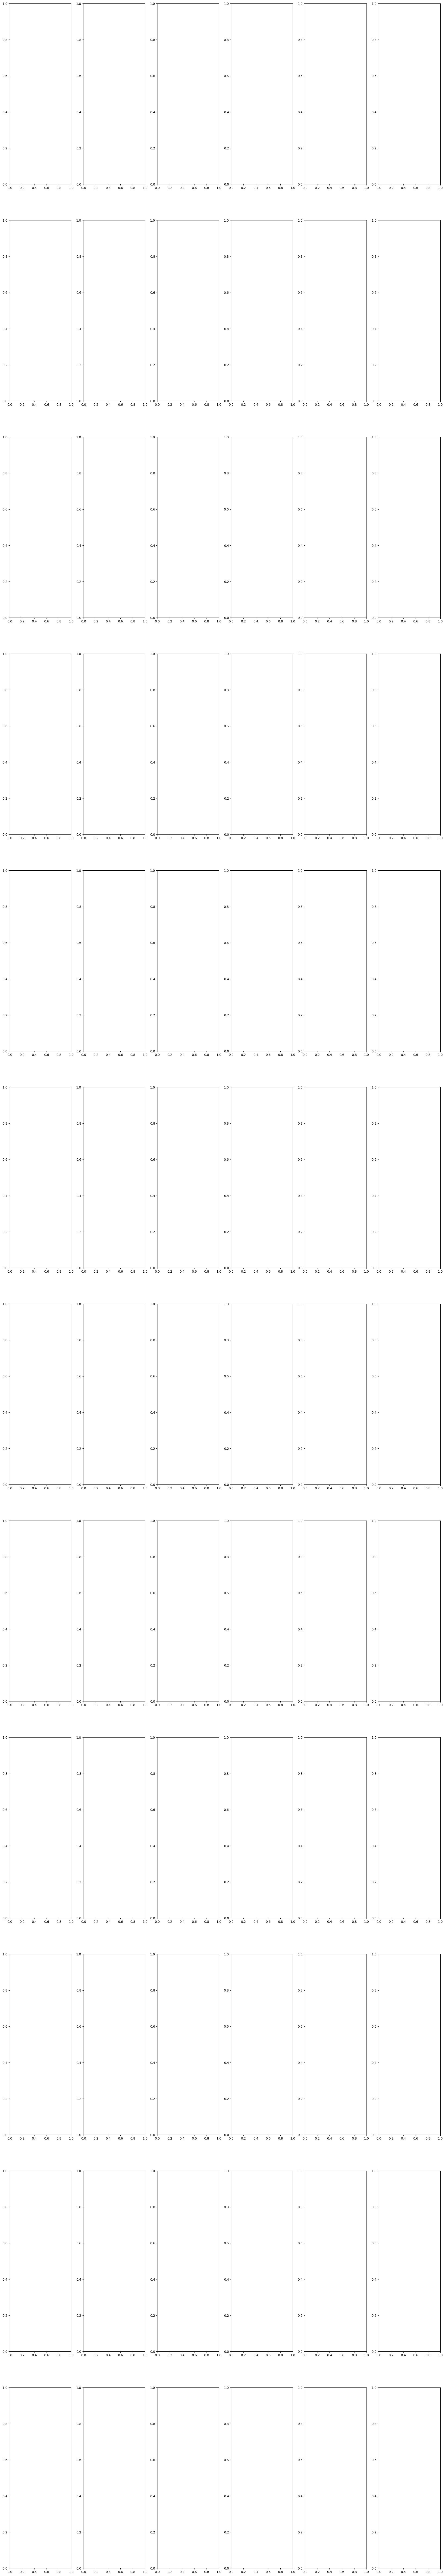

In [7]:
np.random.seed(42)


nrows = 12
ncols = 6

lower_upper = [[0,50], [50,100]]

per_samples = (nrows * ncols) // len(lower_upper)
range_counter = -1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(4*ncols, 12*nrows))
for lower, upper in lower_upper:

    samples = [i for i in range(len(test_cloudy)) if test_cloudy.samples[i]["s2_cloudy"] is not None and 
               lower <= test_cloudy.coverage_dict[test_cloudy.samples[i]["s2_cloudy"].split("/")[-1]] and 
               upper >= test_cloudy.coverage_dict[test_cloudy.samples[i]["s2_cloudy"].split("/")[-1]]]
    np.random.shuffle(samples)

    for j, sample_id in enumerate(samples[:per_samples]):
        range_counter += 1
        row_id = range_counter // ncols
        col_id = range_counter % ncols
        
        data_cloudy = test_cloudy[sample_id]
        data_clear = test_clear[sample_id]
    
        sar = np.clip((data_cloudy["image"][-2:] * sar_std + sar_mean + 25) / 25, 0, 1)

        # print(sar[0].min(), sar[0].max(), sar[1].min(), sar[1].max())
        sar = np.stack([sar[0], sar[1], np.zeros_like(sar[0])], -1).sum(-1)       
        
        opt_cloudy = np.clip(data_cloudy["image"][:3] * brg_std + brg_mean, 0, 3000)/3000
        opt_clear = np.clip(data_clear["image"][:3] * brg_std + brg_mean, 0, 3000)/3000

        img = np.concatenate([np.stack([opt_clear[2],opt_clear[1],opt_clear[0]],-1),
                              np.ones([10,np.shape(opt_clear)[1],3]),
                              np.stack([opt_cloudy[2],opt_cloudy[1],opt_cloudy[0]],-1),
                              np.ones([10,np.shape(opt_clear)[1],3]),
                              np.stack([sar,sar,sar],-1) / sar.max()], 0)
                
        axs[row_id,col_id].imshow(img)
        axs[row_id,col_id].axis("off")

In [75]:
file = torch.load("/home/gawl_ja/Projects/ModalityRelevanceScores/0005_SEN12MS_Train_and_Evaluate/Classification/Experiments/ResNet50_OpticalSAR_clear_seed42/relevance_perc_score_fullFalse.pth")

sar_list, opt_list, accuracy = [], [], []
for f in list(file["Clear"].values()):
    accuracy.append(f["Accuracy"])
    a_opt = f["Correct Opt"] / f["Total Count"]
    a_sar = f["Correct SAR"] / f["Total Count"]
    opt_list.append(accuracy[-1]-a_opt)
    sar_list.append(accuracy[-1]-a_sar)

print("Clear Subset")
print("Accuracy:      ", np.mean(accuracy))
print("Opt Relevance: ", np.mean(opt_list))
print("SAR Relevance: ", np.mean(sar_list))


file = torch.load("/home/gawl_ja/Projects/ModalityRelevanceScores/0005_SEN12MS_Train_and_Evaluate/Classification/Experiments/ResNet50_OpticalSAR_clear_seed42/relevance_perc_score_fullFalse.pth")

sar_list, opt_list, accuracy, targets = [], [], [], []
for f in list(file["Cloudy"].values()):
    accuracy.append(f["Accuracy"])
    a_opt = f["Correct Opt"] / f["Total Count"]
    a_sar = f["Correct SAR"] / f["Total Count"]
    opt_list.append(accuracy[-1]-a_opt)
    sar_list.append(accuracy[-1]-a_sar)
    targets.append(f["Label"])
print("")
print("Cloudy Subset")
print("Accuracy:      ", np.mean(accuracy))
print("Opt Relevance: ", np.mean(opt_list))
print("SAR Relevance: ", np.mean(sar_list))


Clear Subset
Accuracy:       0.20615679776750676
Opt Relevance:  -0.0013684485916107098
SAR Relevance:  0.0003760355803610352

Cloudy Subset
Accuracy:       0.1877124183006536
Opt Relevance:  0.004134030501089321
SAR Relevance:  0.00796705882352941


In [70]:
f = torch.load("/home/gawl_ja/Projects/ModalityRelevanceScores/0005_SEN12MS_Train_and_Evaluate/Classification/Experiments/ResNet50_OpticalSAR_clear_seed42/results.pth")


print(np.mean(f["Clear"]["Predictionss"].sum(0).argmax(-1) == f["Clear"]["Labels"]))



0.6819838727493649
